In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = sns.load_dataset("taxis")

In [4]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [6]:
df['pickup_day']=df['pickup'].dt.day
df['pickup_month']=df['pickup'].dt.month
df['pickup_year']=df['pickup'].dt.year

df['dropoff_day']=df['dropoff'].dt.day
df['dropoff_month']=df['dropoff'].dt.month
df['dropoff_year']=df['dropoff'].dt.year

In [7]:
df['payment'].unique()

array(['credit card', 'cash', nan], dtype=object)

In [8]:
df['payment'].fillna(df['payment'].mode()[0],inplace=True)

<ipython-input-8-3496003702>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['payment'].fillna(df['payment'].mode()[0],inplace=True)


In [9]:
for col in ['pickup_zone','dropoff_zone','pickup_borough','dropoff_borough']:
  df[col].fillna(df[col].mode()[0],inplace=True)

<ipython-input-9-566568533>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


<Axes: >

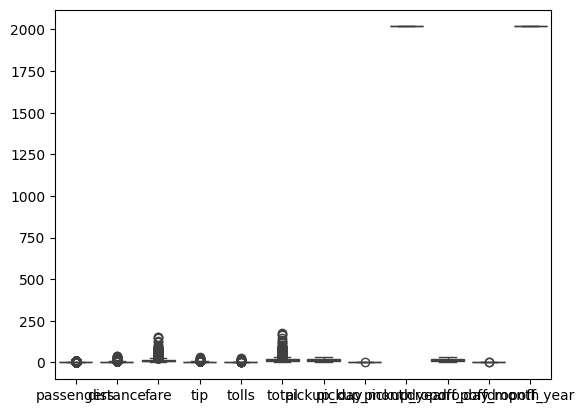

In [10]:
import matplotlib.pyplot as plt
sns.boxplot(df)

In [11]:
## ENcoding
from sklearn.preprocessing import OneHotEncoder
oe=OneHotEncoder(sparse_output=False)
array=oe.fit_transform(df[['color','payment','pickup_zone','dropoff_zone','pickup_borough','dropoff_borough']])

In [12]:
ndf=pd.DataFrame(array,columns=oe.get_feature_names_out(['color','payment','pickup_zone','dropoff_zone','pickup_borough','dropoff_borough']))

In [13]:
ndf.head()

,color_green,color_yellow,payment_cash,payment_credit card,pickup_zone_Allerton/Pelham Gardens,pickup_zone_Alphabet City,pickup_zone_Astoria,pickup_zone_Auburndale,pickup_zone_Battery Park,pickup_zone_Battery Park City,...,dropoff_zone_Yorkville West,pickup_borough_Bronx,pickup_borough_Brooklyn,pickup_borough_Manhattan,pickup_borough_Queens,dropoff_borough_Bronx,dropoff_borough_Brooklyn,dropoff_borough_Manhattan,dropoff_borough_Queens,dropoff_borough_Staten Island
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
df=pd.concat([df,ndf],axis=1)

In [15]:
# drop
cols_to_drop=['color','payment','pickup_zone','dropoff_zone','pickup_borough','dropoff_borough']
df.drop(columns=cols_to_drop,inplace=True)

In [16]:
df.drop(columns=['pickup','dropoff'],inplace=True)

In [17]:
df.head()

,passengers,distance,fare,tip,tolls,total,pickup_day,pickup_month,pickup_year,dropoff_day,...,dropoff_zone_Yorkville West,pickup_borough_Bronx,pickup_borough_Brooklyn,pickup_borough_Manhattan,pickup_borough_Queens,dropoff_borough_Bronx,dropoff_borough_Brooklyn,dropoff_borough_Manhattan,dropoff_borough_Queens,dropoff_borough_Staten Island
0,1,1.60,7.0,2.15,0.0,12.95,23,3,2019,23,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0.79,5.0,0.00,0.0,9.30,4,3,2019,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,1.37,7.5,2.36,0.0,14.16,27,3,2019,27,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,7.70,27.0,6.15,0.0,36.95,10,3,2019,10,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3,2.16,9.0,1.10,0.0,13.40,30,3,2019,30,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
X=df.drop('total',axis=1)
y=df[['total']]

In [19]:
## Scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=42)

In [21]:
X_train.shape ,y_train.shape

((4824, 421), (4824, 1))

In [22]:
import tensorflow
from keras import Sequential
from keras.layers import Dense

In [29]:
model=Sequential()
model.add(Dense(units=32,input_shape=(421,),activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='relu'))

In [30]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

In [31]:
model.fit(X_train,y_train,validation_split=0.2,epochs=20,batch_size=32)

Epoch 1/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 308.5873 - mse: 308.5873 - val_loss: 53.6539 - val_mse: 53.6539
Epoch 2/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 45.6073 - mse: 45.6073 - val_loss: 38.0392 - val_mse: 38.0392
Epoch 3/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 21.2259 - mse: 21.2259 - val_loss: 26.2601 - val_mse: 26.2601
Epoch 4/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.1016 - mse: 12.1016 - val_loss: 20.7537 - val_mse: 20.7537
Epoch 5/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.6812 - mse: 6.6812 - val_loss: 18.4119 - val_mse: 18.4119
Epoch 6/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.2790 - mse: 5.2790 - val_loss: 17.0809 - val_mse: 17.0809
Epoch 7/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7698 - mse: 3.7698 - val_loss: 15.9389 - val_mse: 15.9389
Epoch 8/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.4741 - mse: 3.4741 - val_loss: 15.9110 - val_mse: 15.9110
Epoch 9/20
121/121 ━━━━━━━━━━

In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │        13,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,197 (282.02 KB)

 Trainable params: 24,065 (94.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 48,132 (188.02 KB)

In [35]:
loss = model.evaluate(X_test, y_test)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.1783 - mse: 15.1783


In [36]:
print(f"Loss: {loss}")

Loss: [16.399799346923828, 16.399799346923828]


In [23]:
import pandas as pd

In [33]:
data = pd.read_csv("/1_Churn_Modelling(in).csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])
data["Geography"] = le.fit_transform(data["Geography"])

In [36]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [37]:
X=data.drop(columns=["RowNumber","CustomerId","Surname","Exited"],axis=1)
y=data[['Exited']]

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=42)

In [41]:
X_train.shape ,y_train.shape

((7500, 10), (7500, 1))

In [43]:
import tensorflow
from keras import Sequential
from keras.layers import Dense

model=Sequential()
model.add(Dense(units=128,input_shape=(10,),activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=1,activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse',"accuracy"])

In [48]:
model.fit(X_train,y_train,validation_split=0.2,epochs=20,batch_size=128)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8866 - loss: 0.0824 - mse: 0.0824 - val_accuracy: 0.8447 - val_loss: 0.1164 - val_mse: 0.1164
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8939 - loss: 0.0788 - mse: 0.0788 - val_accuracy: 0.8400 - val_loss: 0.1193 - val_mse: 0.1193
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8975 - loss: 0.0759 - mse: 0.0759 - val_accuracy: 0.8373 - val_loss: 0.1190 - val_mse: 0.1190
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8927 - loss: 0.0757 - mse: 0.0757 - val_accuracy: 0.8413 - val_loss: 0.1191 - val_mse: 0.1191
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8985 - loss: 0.0762 - mse: 0.0762 - val_accuracy: 0.8393 - val_loss: 0.1189 - val_mse: 0.1189
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8932 - loss: 0.0800 - mse: 0.0800 - val_accuracy: 0.8420 - val_loss: 0.1196 - val_mse: 0.1196
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

In [52]:
_, loss, acc = model.evaluate(X_test, y_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8392 - loss: 0.1267 - mse: 0.1267


In [53]:
print(f"Loss: {loss}\nAccuracy: {acc}")

Loss: 0.1287485808134079
Accuracy: 0.8367999792098999
